In [1]:
from sktime.datasets import load_uschange
import matplotlib.pyplot as plt
import numpy as np
from sktime.transformations.panel.dictionary_based import PAA

(187,)


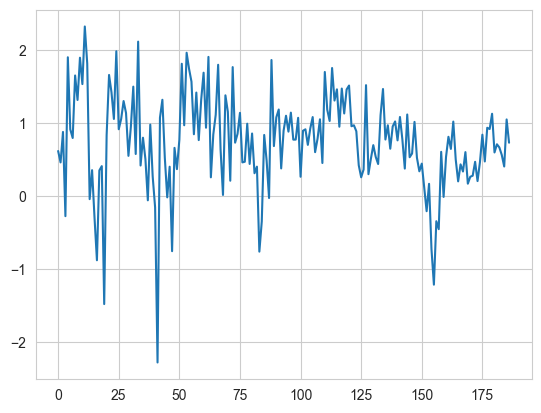

In [2]:
y = load_uschange(y_name="Consumption")[0]
print(y.shape)
y.plot()
plt.show()

## Piecewise Aggregate Approximation

In [3]:
paa = PAA(num_intervals=20)

In [4]:
y_paa = paa.fit_transform(y)

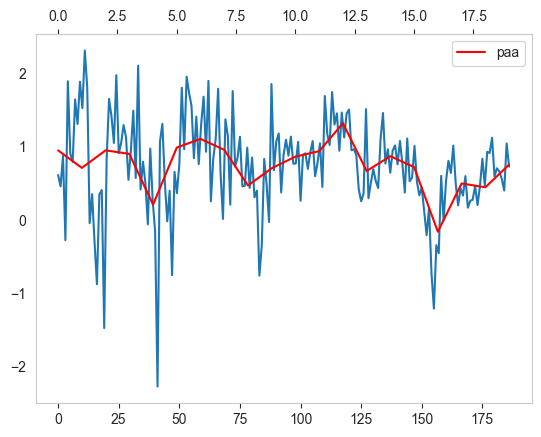

In [5]:
fig, ax1 = plt.subplots()
plt.grid(False)
ax1.plot(y.index, y, label="ts")
ax2 = ax1.twiny()
ax2.plot(y_paa.index, y_paa, "r-", label="paa")
plt.grid(False)
plt.legend()
plt.show()

## Symbolic Aggregate Approximation

In [6]:
from sktime.transformations.series.sax import SAX2

In [7]:
sax = SAX2(word_size=20, alphabet_size=5)

In [8]:
y_sax = sax.fit_transform(y)

In [9]:
y_sax

0     3
1     2
2     3
3     2
4     1
5     3
6     3
7     3
8     1
9     2
10    2
11    3
12    4
13    2
14    2
15    2
16    0
17    1
18    1
19    2
Name: Consumption, dtype: int64

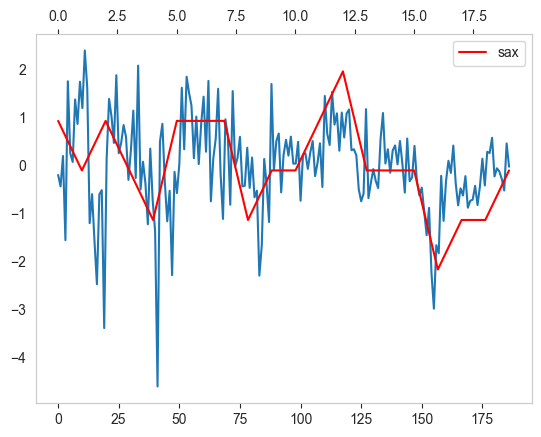

In [10]:
fig, ax1 = plt.subplots()
plt.grid(False)
ax1.plot(y.index, (y - y.mean()) / y.std(), label="ts")
# bin_edges = scipy.stats.norm.ppf(np.linspace(0, 1, 6)[1:-1])
# ax1.hlines(bin_edges, 0, len(y), color="black", linestyles="dashed", alpha=0.5)
ax2 = ax1.twiny()
ax2.plot(y_sax.index, (y_sax - y_sax.mean()) / y_sax.std(), "r-", label="sax")
plt.grid(False)
plt.legend()
plt.show()